# Manipulación de Imagenes

## 1. Librerias

In [1]:
!pip install matplotlib
!pip install mahotas
!pip install cv
!pip install scikit-image
!pip install opencv-python

In [3]:
import numpy as np
import cv2 as cv2
import io as io
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpi
from PIL import Image 
import mahotas
import mahotas.demos

## 2. Lectura

### 2.1. Lectura de imagen en escala de grises con opencv

(-0.5, 511.5, 511.5, -0.5)

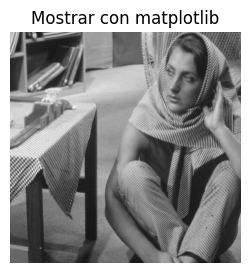

In [4]:
location="./imagenes/barbara.png"
imagen= cv2.imread(location)

plt.figure(figsize=(3,3))
plt.imshow(imagen)
plt.title("Mostrar con matplotlib")
plt.axis("off")

In [3]:
location="./imagenes/barbara.png"
imagen= cv2.imread(location)

cv2.imshow('Mostrar con opencv',imagen)
cv2.waitKey(0) # This show a windows
cv2.destroyAllWindows() # Para cerrar ventana

### 2.2. Lectura de imagen a color con opencv

(-0.5, 511.5, 511.5, -0.5)

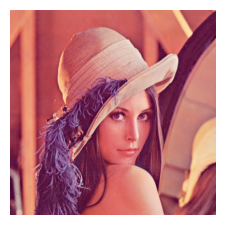

In [9]:
x="./imagenes/_lena.png"
imagen = cv2.imread(x) 
imagen2 = cv2.imread(x,0) 

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis("off")


In [10]:
x="./imagenes/_lena.png"
imagen = cv2.imread(x) 
imagen2 = cv2.imread(x,0) 

cv2.imshow('Mostrar con opencv',imagen)
cv2.waitKey(0) # This show a windows
cv2.destroyAllWindows() # Para cerrar ventana

(-0.5, 511.5, 511.5, -0.5)

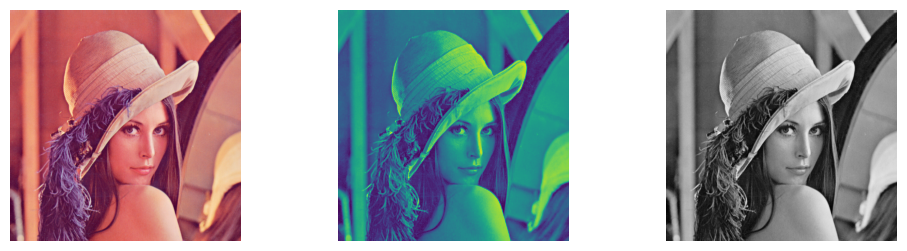

In [18]:
# Mostrar la imagen usando opencv. Además puede usar hconcat([,,]), resize y putText
x="./imagenes/_lena.png"
imagen = cv2.imread(x) 
imagen2 = cv2.imread(x,0) # Escala de grises

# Agregar codigo para obtener el resultado esperado


### 2.3. Lectura de imagenes con matplotlib

(-0.5, 511.5, 511.5, -0.5)

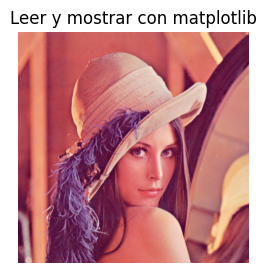

In [13]:
# Si deseo que lo muestre directamente con Pyplot
imagen=mpi.imread('./imagenes/_lena.png') # Lee RGB
plt.figure(figsize=(3,3))
plt.imshow(imagen)
plt.title("Leer y mostrar con matplotlib")
plt.axis("off")

In [11]:
# Imagen en escala de grises , mostrar correctamente usando pyplot subplot
imagen=mpi.imread('./imagenes/barbara.png') # Lee RGB


In [10]:
# Leer con matplotlib y mostrar correctamente con opencv
imagen=mpi.imread('./imagenes/_lena.png') # Lee RGB


### 2.4. Lectura de imagenes con PIL

In [19]:
# Poder mostrar desde Fotos
im=Image.open('./imagenes/_lena.png')
im.show()

### 2.5. Lectura de archivo de video

In [21]:
def rescale_frame(frame, op=0, ratio=0.75,W=200,H=100):
    if op==0:
        width = int(frame.shape[1] * ratio)
        height = int(frame.shape[0] * ratio)
        resized_frame= cv2.resize(frame, (width, height), interpolation=cv2.INTER_AREA)
    else:
        resized_frame = cv2.resize(frame, (W, H), interpolation=cv2.INTER_LINEAR)
    return resized_frame

In [28]:
# Inicializar lectura de archivo de video
vreader = cv2.VideoCapture('./imagenes/Isles of Glencoe.mp4')

#Mostrar el video frame by frame
while True:
    ret, frame = vreader.read()
    if not ret:
        break
    frame = rescale_frame(frame, ratio=0.75)
    cv2.imshow('Mi video', frame) # Mostrar el frame
    
    # Salimos presionando: x
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break     

# Liberar el lector de video
vreader.release()
cv2.destroyAllWindows()

### 2.6. Lectura de video en tiempo real

In [29]:
# Inicializar captura de video en tiempo real solo si tienes una camara instalada
vreader = cv2.VideoCapture(0)

#Mostrar el video frame by frame
while True:
    ret, frame = vreader.read()
    if not ret:
        break
    #frame = rescale_frame(frame, ratio=0.75)
    cv2.imshow('Mi video', frame) # Mostrar el frame
    
    # Salimos presionando: x
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break     

# Liberar el lector de video
vreader.release()
cv2.destroyAllWindows()


## 3. Crear y grabar

### 3.1. Imagen en escala de grises

(-0.5, 79.5, 79.5, -0.5)

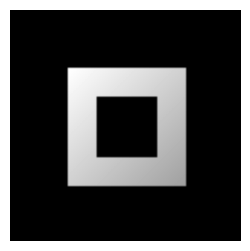

In [21]:
d=(80,80)
img=np.zeros(d)
for i in range(20,61):
    for j in range(20,61):
        img[i,j]=255-i-j
img[30:51,30:51]=0;
img=np.uint8(img)
plt.figure(figsize=(3,3))
plt.imshow(img,cmap=plt.cm.gray)
plt.axis("off")

### 3.2. Imagen a color

(-0.5, 79.5, 79.5, -0.5)

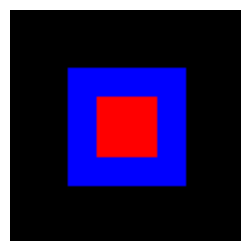

In [15]:
f=c=80
d=(f,c,3)
img=np.zeros(d,dtype=np.uint8)
for i in range(20,61):
    for j in range(20,61):
        img[i,j,0]=img[i,j,1]=0
        img[i,j,2]=255
img[30:51,30:51,0:3]=[255,0,0];
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis("off")

### 3.3. Grabar imagen

In [25]:
f=c=80
d=(f,c,3)
img=np.zeros(d,dtype=np.uint8)
img[20:61,20:61,0:3]=[0,0,255] 
img[30:51,30:51,0:3]=[255,0,0]
cv2.imwrite('MiImagen.png',img) # Grabar imagen directamente

True

(-0.5, 79.5, 79.5, -0.5)

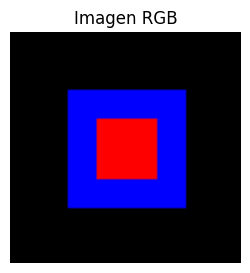

In [26]:
#Leer la imagen guardada
imagen=cv2.imread('MiImagen.png')
plt.figure(figsize=(3,3))
plt.imshow(imagen)
plt.title("Imagen RGB")
plt.axis("off")

In [29]:
# Ahora lea la imagen usando opencv y muestrela usando opencv correctamente, utilice resize de  (400,400)
imagen=cv2.imread('MiImagen.png')


In [30]:
# Poder mostrar desde Fotos imagen generada usando PIL
im=Image.open('MiImagen.png')  # observese que se ha guardado como BGR


### 3.4. Grabar video

In [30]:
# Inicializar captura de video en tiempo real solo si tienes una camara instalada
camara = 0   # La camara por defecto es cero
vreader = cv2.VideoCapture(camara)

# Crear VideoWriter: 
output = 'captura02.mp4'
fps = 30  # Frames x segundo
size = (640, 480)  # Frame size
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec para formato MP4
vwriter = cv2.VideoWriter(output, fourcc, fps, size)

while True:
    ret, frame = vreader.read()
    if not ret:
        break
    cv2.imshow('Captura en tiempo real', frame) # Mostrar el frame
    vwriter.write(frame) # Grabamos el frame
    # Salimos presionando: x
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break     
# Liberar el lector de video
vreader.release()
vwriter.release()
cv2.destroyAllWindows()

## 4.Estructura de una imagen

### 4.1. Tamaño de la imagen.

El número de pixeles de la imagen: filas(alto) x columnas (ancho).

uint8
Dimension: 512 x 512
262144


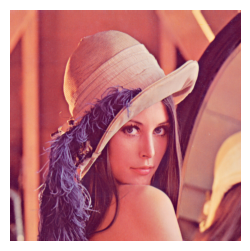

In [32]:
location="./imagenes/_lena.png"
imagen= cv2.imread(location)

plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis("off")

print(imagen.dtype)
print('Dimension:',imagen.shape[0],'x',imagen.shape[1])  # height x width
print(imagen.shape[0]*imagen.shape[1])  # resolucion   print(int(imagen.size/imagen.ndim))  

## 5. Procesamiento de Imágenes

In [4]:
# Convertir imagen en arreglo numpy
ruta="./imagenes/_lena.png"
im = cv2.imread(ruta)

original=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
originalGray=cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

color=np.asarray(original)
gris=np.asarray(originalGray)

print("Imagen original:", np.shape(original))
print("Imagen en escala de grises",np.shape(gris))

Imagen original: (512, 512, 3)
Imagen en escala de grises (512, 512)


### 5.1. Negativo

(512, 512)


(-0.5, 511.5, 511.5, -0.5)

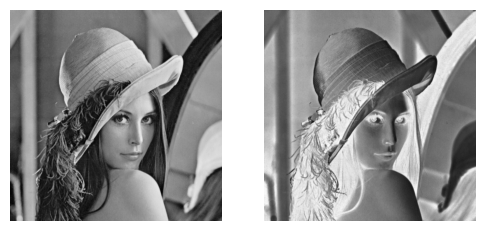

In [5]:
# Negativo escala de grises gris
G=255*np.ones(gris.shape)-gris
print(G.shape)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(originalGray,cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(np.uint8(G),cmap=plt.cm.gray)
plt.axis("off")

### 5.2. Composición alfa

Imagen A: (512, 512, 3)
Imagen B (481, 321, 3)
Resize de Imagen B (512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

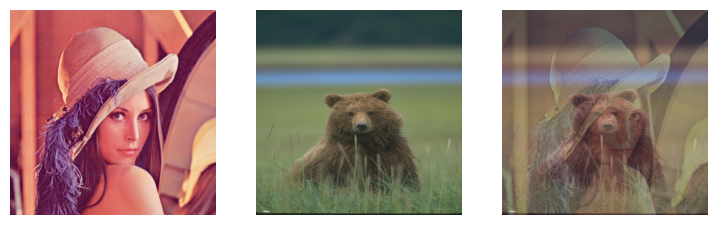

In [8]:
rutaA="./imagenes/_lena.png"
rutaB="./imagenes/100080.jpg"
imA = cv2.imread(rutaA)
imB = cv2.imread(rutaB)

print("Imagen A:", np.shape(imA))
print("Imagen B",np.shape(imB))

# Las imagenes deben tener el mismo tamaño
imB= cv2.resize(imB, (512, 512),interpolation = cv2.INTER_LINEAR) # INTER_AREA, INTER_CUBIC
print("Resize de Imagen B",np.shape(imB))

imA=cv2.cvtColor(imA, cv2.COLOR_BGR2RGB)
imB=cv2.cvtColor(imB, cv2.COLOR_BGR2RGB)
A=np.asarray(imA)
B=np.asarray(imB)

alpha=0.3
C=alpha*A+(1-alpha)*B
imC= np.uint8(C)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(imA)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(imB)
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(imC)
plt.axis("off")


(-0.5, 511.5, 511.5, -0.5)

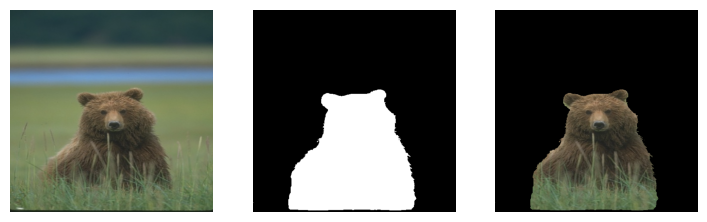

In [9]:
# Extraccion de fondo
rutaA="./imagenes/bear.png"
rutaM="./imagenes/mask.png"
imA = cv2.imread(rutaA)
mask=cv2.imread(rutaM,0)

# Emplee la funcion bitwise_and para la extracción del fondo y obtener el siguiente resultado
# Ademas puede elegir una imagen de fondo y colocar el oso en dichon fondo

### 5.2. Transformaciones geométricas

Imagen A:  (321, 481, 3)


(-0.5, 480.5, 320.5, -0.5)

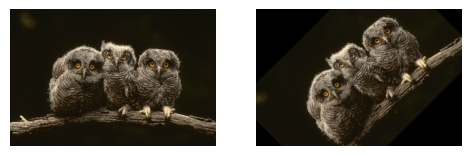

In [10]:
# Rotación
ruta="./imagenes/42044.jpg"
im = cv2.imread(ruta)
print("Imagen A: ", np.shape(im))

#Emplee las funciones: getRotationMatrix2D para definir la matriz de rotacion  y warpAffine para rotar la imagen
# Obtener el resultado mostrado


In [16]:
(np.shape(im)[1], np.shape(im)[0])

Imagen A:  (139, 208, 3)


In [1]:
import cv2
import numpy as np

# Cargar la imagen
ruta = "./imagenes/42044.jpg"
im = cv2.imread(ruta)
print(np.shape(im))

# punto alrededor del cual se realizará la rotación
centro = (np.shape(im)[1] // 2, np.shape(im)[0] // 2)
angulo = 45  # o el ángulo que desees

matriz_rotacion = cv2.getRotationMatrix2D(centro, angulo, 1.0)

tam=(np.shape(im)[1], np.shape(im)[0])
imagen_rotada = cv2.warpAffine(im, matriz_rotacion, tam)

# Mostrar la imagen rotada
cv2.imshow('Imagen Rotada', imagen_rotada)
cv2.waitKey(0)
cv2.destroyAllWindows()


(139, 208, 3)


In [ ]:
import cv2
import numpy as np

# Cargar la imagen
ruta = "./imagenes/42044.jpg"
im = cv2.imread(ruta)
print("Imagen A: ", np.shape(im))

# Definir el centro de la imagen (punto alrededor del cual se realizará la rotación)
# y el ángulo de rotación
centro = (np.shape(im)[1] // 2, np.shape(im)[0] // 2)
angulo = 45  # o el ángulo que desees

# Usar getRotationMatrix2D para obtener la matriz de rotación
matriz_rotacion = cv2.getRotationMatrix2D(centro, angulo, 1.0)

# Rotar la imagen con warpAffine
imagen_rotada = cv2.warpAffine(im, matriz_rotacion, (np.shape(im)[1], np.shape(im)[0]))

# Mostrar la imagen rotada
cv2.imshow('Imagen Rotada', imagen_rotada)
cv2.waitKey(0)
cv2.destroyAllWindows()


Imagen A:  (139, 208, 3)


### 5.3. Binarización

(-0.5, 511.5, 511.5, -0.5)

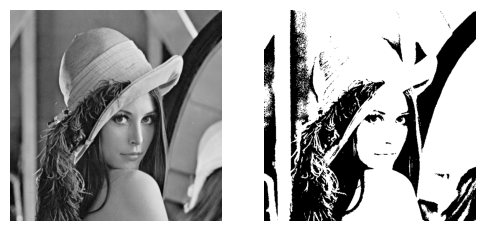

In [12]:
# Binarizacion básica
T=100
G=np.zeros(gris.shape)
G[gris>T]=255

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(gris,cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(np.uint8(G),cmap=plt.cm.gray)
plt.axis("off")

Umbral:  117


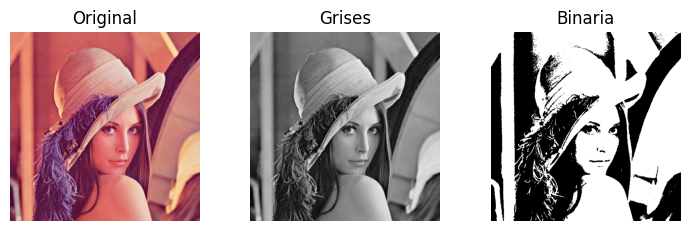

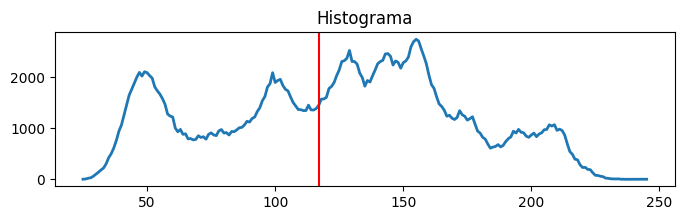

In [13]:
#Binarizacion automatica
from skimage import filters
from skimage import exposure

t=filters.threshold_otsu(gris)
G=gris>t
print("Umbral: ", t)
hist, bins= exposure.histogram(gris)

# Completar el codigo para mostrar 3 imagenes de lena en un figure con subplots 
# En otro figure mostrar el histograma usando plt.plot(bins,hist, lw=2)
# En el histograma agregar la linea vertical roja con axvline

sol

In [7]:
# Convertir imagen en arreglo numpy
ruta="./imagenes/_lena.png"
im = cv2.imread(ruta)

original=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
originalGray=cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

color=np.asarray(original)
gris=np.asarray(originalGray)

print("Imagen original:", np.shape(original))
print("Imagen en escala de grises",np.shape(gris))
G=255*np.ones(gris.shape)-gris


Imagen original: (512, 512, 3)
Imagen en escala de grises (512, 512)


Umbral:  117


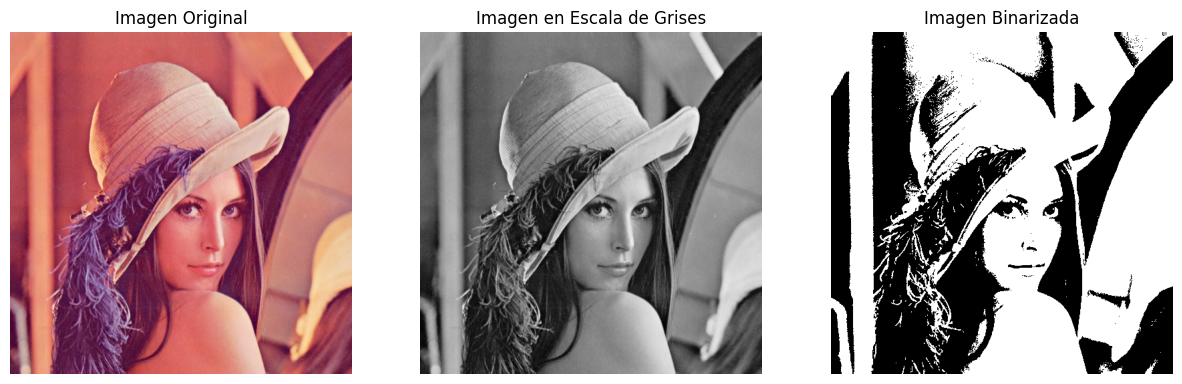

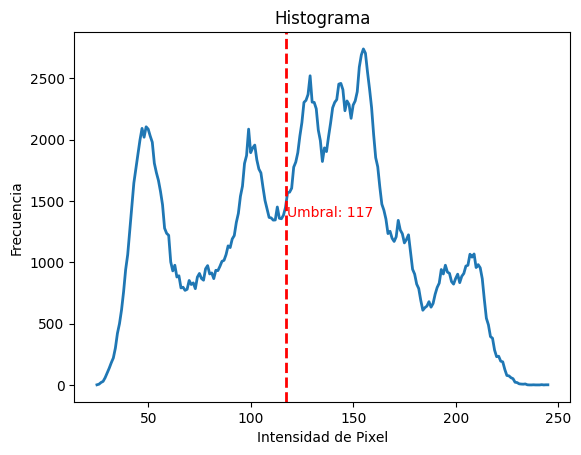

In [9]:
#Binarizacion automatica
from skimage import filters
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import io

t=filters.threshold_otsu(gris)
G=gris>t
print("Umbral: ", t)
hist, bins= exposure.histogram(gris)

# Completar el codigo para mostrar 3 imagenes de lena en un figure con subplots 
# En otro figure mostrar el histograma usando plt.plot(bins,hist, lw=2)
# En el histograma agregar la linea vertical roja con axvline



# 'gris' es la imagen en escala de grises cargada previamente
# y 'G' es la imagen binarizada

# Cargar la imagen original de lena (o cualquier otra imagen que desees)
lena = io.imread('./imagenes/_lena.png')

# Crear una figura con 3 subplots para mostrar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax0, ax1, ax2 = axes

ax0.imshow(lena, cmap='gray')
ax0.set_title('Imagen Original')
ax0.axis('off')

ax1.imshow(gris, cmap='gray')
ax1.set_title('Imagen en Escala de Grises')
ax1.axis('off')

ax2.imshow(G, cmap='gray')
ax2.set_title('Imagen Binarizada')
ax2.axis('off')

plt.show()
#  histograma

fig_hist, ax_hist = plt.subplots()# Crear otra figura


# Mostrar 
ax_hist.plot(bins, hist, lw=2)
ax_hist.set_title('Histograma')
ax_hist.set_xlabel('Intensidad de Pixel')
ax_hist.set_ylabel('Frecuencia')

# Agregar la línea 
ax_hist.axvline(t, color='red', linestyle='dashed', linewidth=2)
ax_hist.text(t+0.5, max(hist)/2, f'Umbral: {t}', color='red')

plt.show()
